In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import sys

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# import the metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import median_absolute_error as MAD

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

# import standard scaler 
from sklearn.preprocessing import StandardScaler

In [89]:
data = '/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Data/cleaned_cars.csv'

In [90]:
df = pd.read_csv(data)

In [91]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0,gas,68696.0,clean,other,4wd,pickup,black,al
2,others,34590,2016.0,chevrolet,others,good,6.0,gas,29499.0,clean,other,4wd,pickup,silver,al
3,others,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,others,29990,2016.0,chevrolet,others,good,6.0,gas,17302.0,clean,other,4wd,pickup,red,al


In [92]:
df = df[~df['title_status'].isin(['parts only', 'missing'])]
df = df.dropna(subset=['title_status'])
df = df.reset_index(drop=True)
df.shape

(326562, 15)

In [93]:
df['type'] = df['type'].replace('pickup', 'truck')

In [94]:
# cylinders column add 'C' to the end of the number
df['cylinders'] = df['cylinders'].astype(str) + 'C'

In [95]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0C,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0C,gas,68696.0,clean,other,4wd,truck,black,al
2,others,34590,2016.0,chevrolet,others,good,6.0C,gas,29499.0,clean,other,4wd,truck,silver,al
3,others,35000,2019.0,toyota,tacoma,excellent,6.0C,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,others,29990,2016.0,chevrolet,others,good,6.0C,gas,17302.0,clean,other,4wd,truck,red,al


In [335]:
# count condition = new 
df['condition'].value_counts()

good         125597
excellent     99343
like new      58413
fair          19484
salvage       16071
new            7654
Name: condition, dtype: int64

Text(0.5, 0, 'Price')

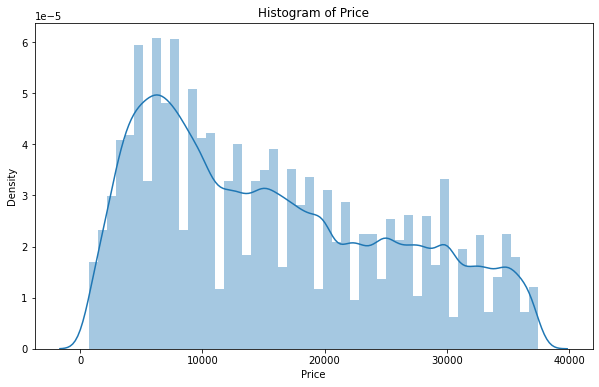

In [96]:
# histogram of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')

Text(0, 0.5, 'Frequency')

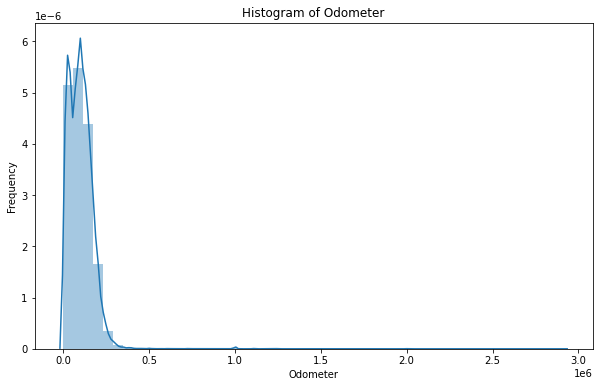

In [97]:
# histogram of odometer
plt.figure(figsize=(10,6))
sns.distplot(df['odometer'], bins=50)
plt.title('Histogram of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')


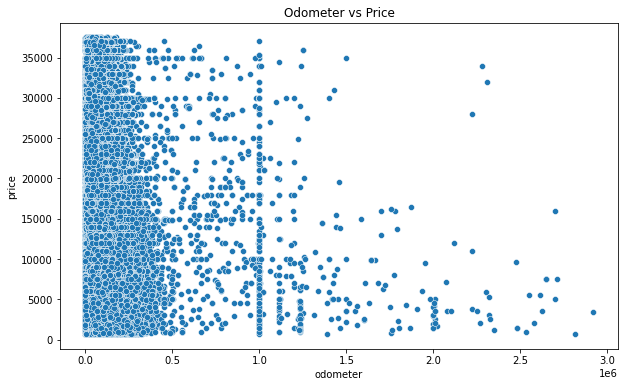

In [98]:
# scatter plot of odometer vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Odometer vs Price')
plt.show()


In [337]:
# select rows where odometer is less than 500000 and condition is not equal to new 
df = df[(df['odometer'] < 500000) & (df['condition'] != 'new')]

In [338]:
df.shape

(318115, 15)

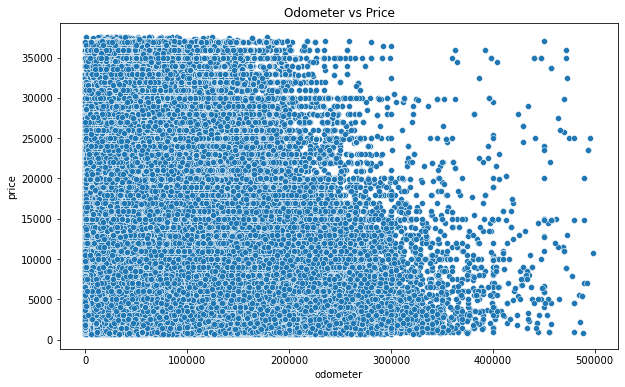

In [339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Odometer vs Price')
plt.show()

In [340]:
df = df[(df['odometer'] < 300000) & (df['price'] < 30000)]

df.shape

(283293, 15)

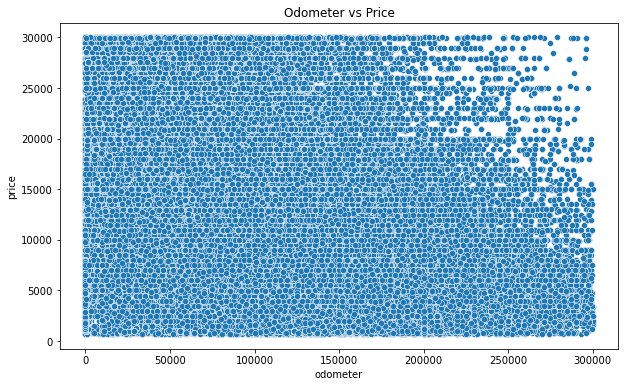

In [341]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Odometer vs Price')
plt.show()

In [342]:
# df = df[(df['odometer'] < 350000) & (df['price'] < 25000)]
# df = df[(df['odometer'] < 400000) & (df['price'] < 5000)]
# df = df[(df['odometer'] < 500000) & (df['price'] < 2000)]

In [343]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0C,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0C,gas,68696.0,clean,other,4wd,truck,black,al
4,others,29990,2016.0,chevrolet,others,good,6.0C,gas,17302.0,clean,other,4wd,truck,red,al
5,others,4500,1992.0,jeep,others,excellent,6.0C,gas,192000.0,clean,automatic,4wd,truck,red,al
7,others,24590,2017.0,chevrolet,others,good,6.0C,gas,40784.0,clean,other,4wd,truck,white,al


In [344]:
# drop region, state
df = df.drop(['region', 'state'], axis=1)

In [345]:
# calculate age of car
df['age'] = 2020 - df['year']
df['age'] = df['age'].apply(lambda x: x if x > 0 else 0)

# drop year
df = df.drop('year', axis=1)

df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
0,15000,ford,others,excellent,6.0C,gas,128000.0,clean,automatic,rwd,truck,black,7.0
1,27990,gmc,others,good,8.0C,gas,68696.0,clean,other,4wd,truck,black,8.0
4,29990,chevrolet,others,good,6.0C,gas,17302.0,clean,other,4wd,truck,red,4.0
5,4500,jeep,others,excellent,6.0C,gas,192000.0,clean,automatic,4wd,truck,red,28.0
7,24590,chevrolet,others,good,6.0C,gas,40784.0,clean,other,4wd,truck,white,3.0


In [346]:
import copy

In [347]:
dfx = copy.deepcopy(df)
df = dfx

#### Modeling 

In [348]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [349]:
df.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'age'],
      dtype='object')

In [350]:
df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
        'title_status', 'transmission', 'drive', 'type',
       'paint_color']] = df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type',
       'paint_color']].apply(le.fit_transform)

In [352]:
df.shape

(283293, 13)

In [353]:
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
0,15000,7,31,0,5,2,128000.0,0,0,2,9,0,7.0
1,27990,8,31,2,6,2,68696.0,0,2,0,9,0,8.0
4,29990,4,31,2,5,2,17302.0,0,2,0,9,8,4.0
5,4500,11,31,0,5,2,192000.0,0,0,0,9,8,28.0
7,24590,4,31,2,5,2,40784.0,0,2,0,9,10,3.0


In [354]:
# select first 50000 rows using loc method
df = df.loc[0:50000, :]
# df = df.sample(n=50000, replace=False)

In [355]:
# condition       0.027984
# transmission    0.012929
# title_status    0.009430


In [356]:
y= df.price
X= df.drop(['price', 'transmission', 'title_status', ], axis=1)

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [358]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34613, 10) (34613,)
(8654, 10) (8654,)


In [359]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [360]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 2577.11
Mean Squared Error: 15417598.76
Root Mean Squared Error: 3926.53
75.13507540734842


In [361]:
# get feature importance

feature_imp = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

age             0.367992
odometer        0.243868
manufacturer    0.076880
cylinders       0.063003
type            0.061322
fuel            0.045088
model           0.039990
drive           0.036358
paint_color     0.035234
condition       0.030265
dtype: float64

In [362]:
dfx.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
0,15000,7,31,0,5,2,128000.0,0,0,2,9,0,7.0
1,27990,8,31,2,6,2,68696.0,0,2,0,9,0,8.0
4,29990,4,31,2,5,2,17302.0,0,2,0,9,8,4.0
5,4500,11,31,0,5,2,192000.0,0,0,0,9,8,28.0
7,24590,4,31,2,5,2,40784.0,0,2,0,9,10,3.0


In [364]:
dfA = copy.deepcopy(dfx)

In [ ]:
dfA.to_csv('Data/clean_v2.csv', index=False)

In [76]:
df = pd.read_csv('Data/clean_v2.csv')
# df.drop(['transmission'], axis=1, inplace=True)

In [77]:
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
0,15000,7,31,0,5,2,128000.0,0,0,2,9,0,7.0
1,27990,8,31,2,6,2,68696.0,0,2,0,9,0,8.0
2,29990,4,31,2,5,2,17302.0,0,2,0,9,8,4.0
3,4500,11,31,0,5,2,192000.0,0,0,0,9,8,28.0
4,24590,4,31,2,5,2,40784.0,0,2,0,9,10,3.0


In [78]:
# shapiro test for normality
from scipy.stats import shapiro
stat, p = shapiro(df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('price looks Gaussian (fail to reject H0)')
else:
    print('price does not look Gaussian (reject H0)')
    

Statistics=0.945, p=0.000
price does not look Gaussian (reject H0)


Text(0.5, 1.0, 'Price Distribution')

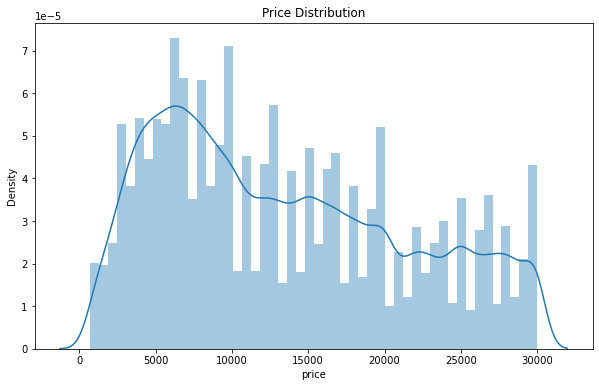

In [79]:
# plot histogram of price
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=50)
plt.title('Price Distribution')

In [80]:
df['price'] = np.log(df['price'])

Text(0.5, 1.0, 'Price Distribution')

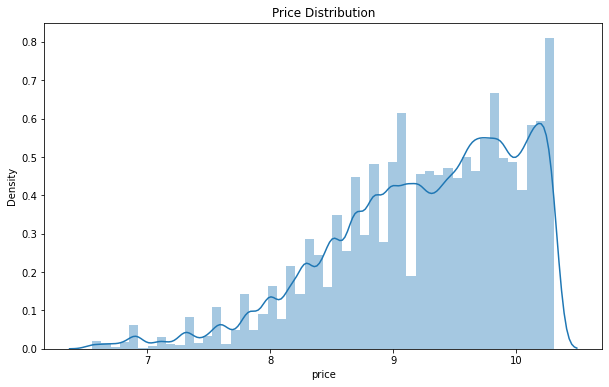

In [81]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=50)
plt.title('Price Distribution')

In [82]:
# select first 50000 rows using loc method
df = df.loc[0:100000, :]

In [83]:
X= df.drop(['price'], axis=1)
y= df.price

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (model.score(X_test, y_test)*100)

69.52879346402896


In [74]:
# import KFold from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
scoring = 'r2'

In [75]:
models = []
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
    print(msg)


RandomForestRegressor: 0.780000 (0.004792)
XGBRegressor: 0.760000 (0.005678)
GB: 0.670000 (0.004856)
KNN: 0.460000 (0.011489)
CART: 0.570000 (0.009254)


In [51]:
# with scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = []
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('GB', GradientBoostingRegressor()))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
    print(msg)

RandomForestRegressor: 0.760000 (0.056068)
XGBRegressor: 0.760000 (0.064456)
GB: 0.760000 (0.061651)
